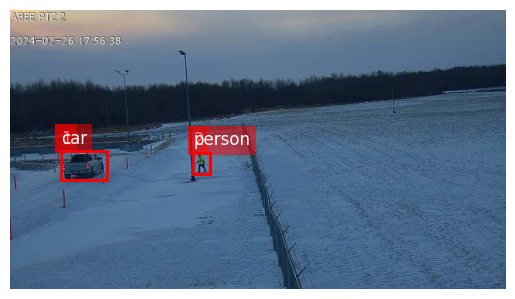

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_gt_on_image(image_path, gt_txt_path):
    """
    Plots normalized ground truth bounding boxes on an image from a .txt file.

    Parameters:
    - image_path: Path to the image file.
    - gt_txt_path: Path to the .txt file containing normalized ground truth bounding boxes.
    """
    # Load the image to get its dimensions
    img = Image.open(image_path)
    img_width, img_height = img.size
    img = plt.imread(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Read ground truth bounding boxes from the .txt file and plot each box
    with open(gt_txt_path, 'r') as gt_file:
        for line in gt_file:
            class_name, x_min, y_min, width, height = line.strip().split(',')
            x_min, y_min, width, height = map(float, [x_min, y_min, width, height])

            # Convert normalized coordinates to pixel coordinates
            x_min, width = x_min * img_width, width * img_width
            y_min, height = y_min * img_height, height * img_height
            x_max, y_max = x_min + width, y_min + height

            # Plot a rectangle around the object
            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none', label=class_name)
            ax.add_patch(rect)
            # Add a text label near the bounding box for the class name
            ax.text(x_min, y_min - 10, class_name, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5, edgecolor='none'))

    plt.axis('off')  # Optionally remove the axis for visual clarity
    plt.show()

# Example usage
image_path = '/Users/rishabpal/Downloads/rishabh/valid/Abee_0_3_png.rf.ca71ec8e7c4aea10ae77705a5a9defd5.jpg'
gt_txt_path = '/Users/rishabpal/Downloads/rishabh/coco_annotations/output/txt_files/Abee_0_3_png.rf.ca71ec8e7c4aea10ae77705a5a9defd5.txt'
# gt_txt_path = "/Users/rishabpal/Downloads/rishabh/imageAnalysisOutput/Abee_0_3_png.rf.ca71ec8e7c4aea10ae77705a5a9defd5.txt"
plot_gt_on_image(image_path, gt_txt_path)